Si bien obtuvimos atributos de la tabla de caracteristicas de los inmuebles, vemos que por ejemplo, si tiene o no piscina, no es algo que tengamos disponible de los inmuebles.

Y es un atributo que nos interesa agregar al conjunto de datos.

Para esto, de los html que poseemos, realizamos este parser, que obtiene la descripción de los inmuebles, para luego realizar su procesamiento y obtener algunos atributos extra.

Por el mismo motivo que con el Spec Table Parser, como los archivos HTML pesan 10GB, los procesamos en cada una de las instancias, y guardamos el archivo resultante en Google Storage. 

Para luego descargar estos archivos procesados, que tienen un tamaño pequeño. 

En esta notebook, mostramos las funciones core del código ejecutado en cada una de las instancias.

Hardcodeamos un permalink para usar de prueba.

In [ ]:
permalink = 'https://departamento.mercadolibre.com.ar/MLA-1115321672-departamento-villa-devoto-_JM'

Realizamos la petición a dicho permalink.

In [ ]:
import requests

r = requests.get(permalink)

Parseamos el tag "p" cuya clase es "ui-pdp-description__content". Esto, como en casos anteriores, lo vimos utilizando las herramientas del desarrollador del navegador.

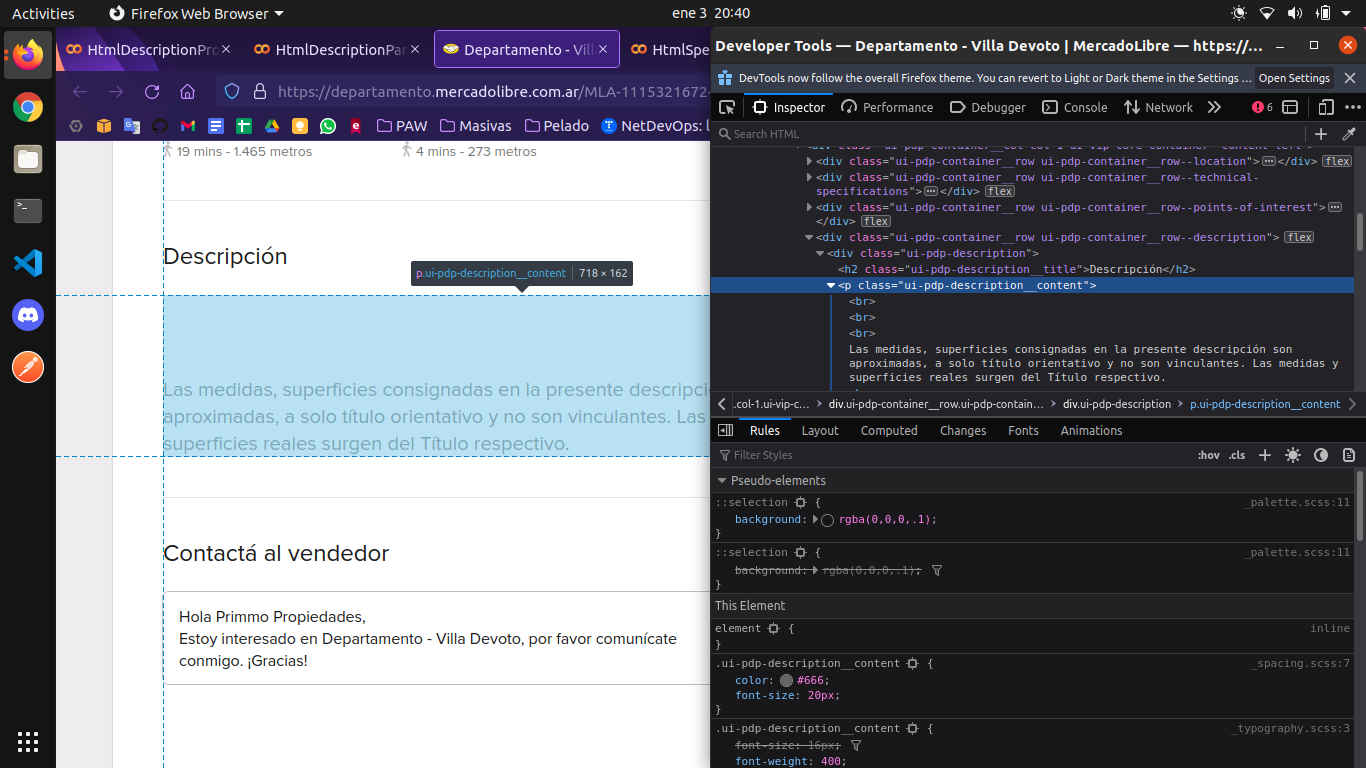

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
p = str(soup.find_all("p", {"class":"ui-pdp-description__content"})[0])

Vemos que contiene las palabras de la descripción, pero con elementos HTML, y espacios, que son tomados como "\r"

In [ ]:
p

'<p class="ui-pdp-description__content"> <br/> <br/><br/>Las medidas, superficies consignadas en la presente descripción son aproximadas, a solo título orientativo y no son vinculantes. Las medidas y superficies reales surgen del Título respectivo.<br/></p>'

Por el motivo anteriormente mencionado, limpiamos la descripción de esta forma.

In [ ]:
cleaned_description = p.replace("\r", "") \
                       .replace("<br/>", "") \
                       .replace("<p class=\"ui-pdp-description__content\">", "") \
                       .replace("</p>", "") \
                       .upper() \
                       .split(" ")



Y vemos que resulta en una descripción limpia como la siguiente.

In [ ]:
cleaned_description[:10]

['',
 '',
 'LAS',
 'MEDIDAS,',
 'SUPERFICIES',
 'CONSIGNADAS',
 'EN',
 'LA',
 'PRESENTE',
 'DESCRIPCIÓN']

El código fuente ejecutado en las 12 instancias workers de Google, se encuentra en el repositorio en el path html_description_parser/source_code/